In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import defaultdict
warnings.filterwarnings("ignore")

C:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("F:/datafiles/d11.csv")

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.shape

(150460, 21)

# Total Runs Scored By Each Team In Each Match

In [5]:
run_analysis=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum()
run_analysis=pd.DataFrame(run_analysis).reset_index()
run_analysis

,match_id,inning,batting_team,total_runs
0,1,1,Sunrisers Hyderabad,207
1,1,2,Royal Challengers Bangalore,172
2,2,1,Mumbai Indians,184
3,2,2,Rising Pune Supergiant,187
4,3,1,Gujarat Lions,183
...,...,...,...,...
1279,634,2,Kolkata Knight Riders,140
1280,635,1,Gujarat Lions,162
1281,635,2,Sunrisers Hyderabad,163
1282,636,1,Sunrisers Hyderabad,208


# Detailed Run Analysis

In [6]:
detailed_run_analysis=pd.crosstab([df['match_id'],df['inning'],df['batting_team']], df['total_runs'],margins = False) 
score=np.array(run_analysis['total_runs'].values)
score=score.transpose()
detailed_run_analysis['final_Score']=score
detailed_run_analysis.head(6)

total_runs                                    0   1   2  3   4  5   6  7  \
match_id inning batting_team                                               
1        1      Sunrisers Hyderabad          26  62  10  1  17  0   9  0   
         2      Royal Challengers Bangalore  44  48   8  0  15  0   8  0   
2        1      Mumbai Indians               41  55   5  0  12  1  11  0   
         2      Rising Pune Supergiant       29  59  10  0  18  0   6  0   
3        1      Gujarat Lions                35  55   6  0  20  0   6  0   
         2      Kolkata Knight Riders        21  39   8  0  19  1   8  0   

total_runs                                   final_Score  
match_id inning batting_team                              
1        1      Sunrisers Hyderabad                  207  
         2      Royal Challengers Bangalore          172  
2        1      Mumbai Indians                       184  
         2      Rising Pune Supergiant               187  
3        1      Gujarat Lions                        183  
         2      Kolkata Knight Riders                184

# Top 5 Highest Scoring Teams

In [7]:
Highest_scoring_teams=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().sort_values(ascending=False).head()

,match_id,inning,batting_team,total_runs
0,411,1,Royal Challengers Bangalore,263
1,620,1,Royal Challengers Bangalore,248
2,206,1,Chennai Super Kings,246
3,61,1,Chennai Super Kings,240
4,562,1,Royal Challengers Bangalore,235


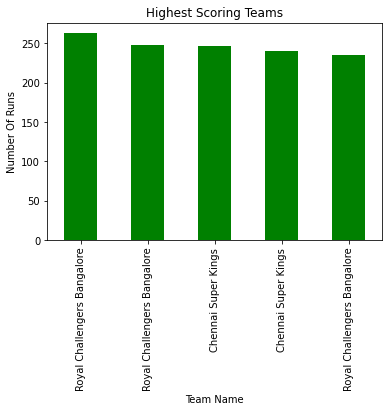

In [8]:
Highest_scoring_teams=pd.DataFrame(Highest_scoring_teams)
Highest_scoring_teams=Highest_scoring_teams.reset_index()
Highest_scoring_teams.plot.bar(x="batting_team",y="total_runs",color='green',legend=None)
plt.title("Highest Scoring Teams")
plt.ylabel("Number Of Runs")
plt.xlabel("Team Name")
Highest_scoring_teams

# Economy Rate Of Bowler[Sunil Narine]

In [9]:
narine=df[df["bowler"]=='SP Narine']  ##Records Having Only Sunil Narine As Bowler
narine.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
508,3,1,Gujarat Lions,Kolkata Knight Riders,3,1,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
509,3,1,Gujarat Lions,Kolkata Knight Riders,3,2,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
510,3,1,Gujarat Lions,Kolkata Knight Riders,3,3,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
511,3,1,Gujarat Lions,Kolkata Knight Riders,3,4,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
512,3,1,Gujarat Lions,Kolkata Knight Riders,3,5,JJ Roy,BB McCullum,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [10]:
runs_given=narine['total_runs'].sum()
overs_count=narine['over'].count()
overs_count=overs_count/6
economy_rate=runs_given/overs_count
print('Economy Rate:',economy_rate)

Economy Rate: 6.395705521472393


# Strike Rate Of Batsman[Chris Gayle]

In [11]:
#Taking Out Records Having Only Chris Gayle As Batsman
c_gayle=df[df['batsman']=='CH Gayle']
c_gayle.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [12]:
total_number_of_runs=c_gayle['total_runs'].sum()
number_of_balls_faced =c_gayle['ball'].sum()
strike_rate=total_number_of_runs/number_of_balls_faced*100

print("Total Runs Scored By Gayle In Ipl:",total_number_of_runs)
print("Number Of Balls Faced By Chris Gayle:",number_of_balls_faced)
print("Strike Rate:",strike_rate)

Total Runs Scored By Gayle In Ipl: 3914
Number Of Balls Faced By Chris Gayle: 9151
Strike Rate: 42.77128182712272


# Average Score Of Batsman[Suresh Raina]

In [13]:
#Taking Out Records Having Only Suresh Raina As Batsman 
suresh_raina=df[df["batsman"] == "SK Raina"]
suresh_raina

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
515,3,1,Gujarat Lions,Kolkata Knight Riders,4,2,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
516,3,1,Gujarat Lions,Kolkata Knight Riders,4,3,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
520,3,1,Gujarat Lions,Kolkata Knight Riders,5,1,SK Raina,BB McCullum,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
526,3,1,Gujarat Lions,Kolkata Knight Riders,6,1,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
527,3,1,Gujarat Lions,Kolkata Knight Riders,6,2,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149982,635,1,Gujarat Lions,Sunrisers Hyderabad,3,1,SK Raina,BB McCullum,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
149983,635,1,Gujarat Lions,Sunrisers Hyderabad,3,2,SK Raina,BB McCullum,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
149984,635,1,Gujarat Lions,Sunrisers Hyderabad,3,3,SK Raina,BB McCullum,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149988,635,1,Gujarat Lions,Sunrisers Hyderabad,4,1,SK Raina,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [14]:
suresh_raina_total=suresh_raina['batsman_runs'].sum()
num_of_matches=len(suresh_raina['match_id'].unique())
avg_score=suresh_raina_total/num_of_matches
print("Total Number Of Runs Scored By Suresh Raina In Ipl:",suresh_raina_total)
print("Number Of Matches Played By Suresh Raina In Ipl:",num_of_matches)
print("Average Score Of Suresh Raina:",avg_score)

Total Number Of Runs Scored By Suresh Raina In Ipl: 4548
Number Of Matches Played By Suresh Raina In Ipl: 157
Average Score Of Suresh Raina: 28.96815286624204


# Top 5 Best Fielders Of IPL

In [15]:
fielder=df.groupby('fielder')['dismissal_kind'].count().sort_values(ascending=False)
fielder=pd.DataFrame(fielder.head(5))
fielder.rename(columns={'dismissal_kind':'most_dismissals'},inplace=True)
fielder

,most_dismissals
fielder,
KD Karthik,127
MS Dhoni,126
RV Uthappa,115
AB de Villiers,101
SK Raina,96


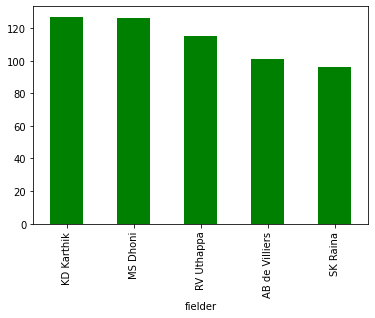

In [16]:
fielder.plot.bar(color='Green',legend=None)
plt.ylabel("")
plt.show()

# Top 5 Highest Wicket Takers Of IPL

In [17]:
#Grouping The Bowlers based on the wickets taken in a descending order
most_wickets=df['dismissal_kind'].groupby(df['bowler']).count().sort_values(ascending=False)

In [18]:
most_wickets=pd.DataFrame(most_wickets.head())
most_wickets.head()
most_wickets.rename(columns={'dismissal_kind':'wickets'},inplace=True)
most_wickets

,wickets
bowler,
SL Malinga,170
A Mishra,142
DJ Bravo,137
Harbhajan Singh,136
PP Chawla,133


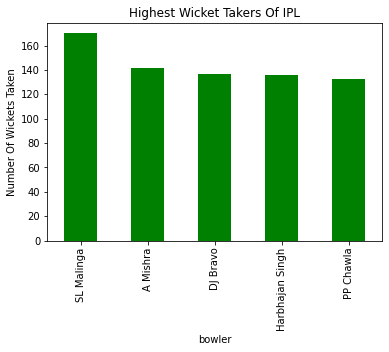

In [19]:
most_wickets.plot.bar(color='green',legend=None)
plt.ylabel("Number Of Wickets Taken")
plt.title("Highest Wicket Takers Of IPL")
plt.show()

# Top 5 Highest Run Scorers Of IPL

In [20]:
#Group The Batsman Based On Their Runs Scored In A Descending Order
batsman_runs = df.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)
#Convert It Into A DataFrame
batsman_runs=pd.DataFrame(batsman_runs.head())
batsman_runs.head()

,batsman_runs
batsman,
SK Raina,4548
V Kohli,4423
RG Sharma,4207
G Gambhir,4132
DA Warner,4014


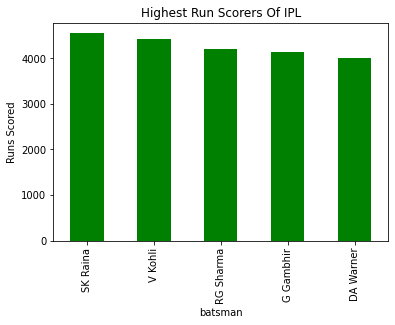

In [21]:
batsman_runs.plot(kind='bar',color='green',legend=None)
plt.ylabel('Runs Scored')
plt.title("Highest Run Scorers Of IPL")
plt.show()

# Top 5 Teams With Highest Wins

In [22]:
#Separated Data Based On Innings
inn1=df.loc[df['inning'] == 1]
inn2=df.loc[df['inning']==2]
inn3=df.loc[df['inning']==3]
inn4=df.loc[df['inning']==4]

In [23]:
inn1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
inn2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [25]:
#Grouped Total_runs In Each Inning Based On Match Id,Inning,batting_team
inn1=inn1.groupby(['match_id','inning','batting_team'])['total_runs'].sum()
inn2=inn2.groupby(['match_id','inning','batting_team'])['total_runs'].sum()
inn3=inn3.groupby(['match_id','inning','batting_team'])['total_runs'].sum()
inn4=inn4.groupby(['match_id','inning','batting_team'])['total_runs'].sum()

In [26]:
inn1.head()

match_id  inning  batting_team               
1         1       Sunrisers Hyderabad            207
2         1       Mumbai Indians                 184
3         1       Gujarat Lions                  183
4         1       Rising Pune Supergiant         163
5         1       Royal Challengers Bangalore    157
Name: total_runs, dtype: int64

In [27]:
inn2.head()

match_id  inning  batting_team               
1         2       Royal Challengers Bangalore    172
2         2       Rising Pune Supergiant         187
3         2       Kolkata Knight Riders          184
4         2       Kings XI Punjab                164
5         2       Delhi Daredevils               142
Name: total_runs, dtype: int64

In [28]:
#Inning 1 And Inning 2 Are Normal Innings Played By Each Team So Grouped Them Together Based On Match_Id
all_matches=pd.merge(inn1,inn2,on='match_id')

#Inning 3 And Inning 4 Are Super Over So Grouped Them Separately Based On Match_id
super_overs=pd.merge(inn3,inn4,on='match_id')

In [29]:
all_matches

,total_runs_x,total_runs_y
match_id,,
1,207,172
2,184,187
3,183,184
4,163,164
5,157,142
...,...,...
632,138,139
633,158,159
634,162,140


In [30]:
super_overs

,total_runs_x,total_runs_y
match_id,,
34,11,6
126,15,18
190,9,10
388,20,15
401,15,11
476,11,11
536,15,6


In [31]:
#Comparing Scores Of Both Teams And Storing The Result In New Column Named Result For Normal innings
ut=[]
for i in range(len(all_matches)):
    a=all_matches['total_runs_x'].iloc[i]
    b=all_matches['total_runs_y'].iloc[i]
    if a>b:
        ut.append("team1 won")
    elif a<b:
        ut.append("team 2 won")
    elif a==b:
        ut.append("draw")
all_matches['result']=ut
all_matches=pd.DataFrame(all_matches)
all_matches

,total_runs_x,total_runs_y,result
match_id,,,
1,207,172,team1 won
2,184,187,team 2 won
3,183,184,team 2 won
4,163,164,team 2 won
5,157,142,team1 won
...,...,...,...
632,138,139,team 2 won
633,158,159,team 2 won
634,162,140,team1 won


In [32]:
#Comparing Scores Of Both Teams And Storing The Result In New Column Named Super_Over_Result For Super Overs
ut1=[]
for i in range(len(super_overs)):
    a1=all_matches['total_runs_x'].iloc[i]
    b1=all_matches['total_runs_y'].iloc[i]
    if a1>b1:
        ut1.append("team1 won")
    elif a1<b1:
        ut1.append("team 2 won")
    elif a1==b1:
        ut1.append("draw")
super_overs['super_over_result']=ut1
super_overs=pd.DataFrame(super_overs)
super_overs

,total_runs_x,total_runs_y,super_over_result
match_id,,,
34,11,6,team1 won
126,15,18,team 2 won
190,9,10,team 2 won
388,20,15,team 2 won
401,15,11,team1 won
476,11,11,team 2 won
536,15,6,team 2 won


In [33]:
#Renaming The Columns Of Super_overs Data
super_overs=super_overs.rename(columns={'total_runs_x':'total_runs_x1','total_runs_y':'total_runs_y1'})
super_overs

,total_runs_x1,total_runs_y1,super_over_result
match_id,,,
34,11,6,team1 won
126,15,18,team 2 won
190,9,10,team 2 won
388,20,15,team 2 won
401,15,11,team1 won
476,11,11,team 2 won
536,15,6,team 2 won


In [34]:
#Creating super_over_result column into all_matches data and storing super_over_result from super_over into it
all_matches['super_over_result']=super_overs['super_over_result']
all_matches=all_matches.fillna('No Super Over')
all_matches.reset_index(inplace=True)
all_matches

,match_id,total_runs_x,total_runs_y,result,super_over_result
0,1,207,172,team1 won,No Super Over
1,2,184,187,team 2 won,No Super Over
2,3,183,184,team 2 won,No Super Over
3,4,163,164,team 2 won,No Super Over
4,5,157,142,team1 won,No Super Over
...,...,...,...,...,...
629,632,138,139,team 2 won,No Super Over
630,633,158,159,team 2 won,No Super Over
631,634,162,140,team1 won,No Super Over
632,635,162,163,team 2 won,No Super Over


In [35]:
#Taking out Unqiue Match_id With Both Team Names Played In That Match
#batt=[] Stores Team Names
#m_id1=[] Stores Match_id
batt=[]
m_id1=[]
for i in range(0,150458):
    if df['batting_team'].iloc[i]!=df['batting_team'].iloc[i+1]:
        batt.append(df['batting_team'].iloc[i])
        m_id1.append(df['match_id'].iloc[i])
    else:
        pass

In [36]:
m_id1=pd.DataFrame(m_id1)
m_id1['Team 1']=batt

In [37]:
m_id1.rename(columns={0:'match_id'})

,match_id,Team 1
0,1,Sunrisers Hyderabad
1,1,Royal Challengers Bangalore
2,2,Mumbai Indians
3,2,Rising Pune Supergiant
4,3,Gujarat Lions
...,...,...
1263,633,Royal Challengers Bangalore
1264,634,Sunrisers Hyderabad
1265,634,Kolkata Knight Riders
1266,635,Gujarat Lions


In [38]:
#Teams Who Played 1st Inning
bat1=[]
for i in range(0,1268,2):
    bat1.append(m_id1.loc[i])

In [39]:
#Teams Who Played 2nd Inning
bat2=[]
for i in range(1,1268,2):
    bat2.append(m_id1.loc[i])
    

In [40]:
#Converting List To DataFrames
bat1=pd.DataFrame(bat1)
bat2=pd.DataFrame(bat2)

In [41]:
bat1

,0,Team 1
0,1,Sunrisers Hyderabad
2,2,Mumbai Indians
4,3,Gujarat Lions
6,4,Rising Pune Supergiant
8,5,Royal Challengers Bangalore
...,...,...
1258,631,Kolkata Knight Riders
1260,632,Delhi Daredevils
1262,633,Gujarat Lions
1264,634,Sunrisers Hyderabad


In [42]:
bat2

,0,Team 1
1,1,Royal Challengers Bangalore
3,2,Rising Pune Supergiant
5,3,Kolkata Knight Riders
7,4,Kings XI Punjab
9,5,Delhi Daredevils
...,...,...
1259,631,Sunrisers Hyderabad
1261,632,Royal Challengers Bangalore
1263,633,Royal Challengers Bangalore
1265,634,Kolkata Knight Riders


In [43]:
bat1.rename(columns={0:"match_id"},inplace=True)
bat2.rename(columns={0:"match_id"},inplace=True)
batting=bat1.merge(bat2,on='match_id')
batting

,match_id,Team 1_x,Team 1_y
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2,Mumbai Indians,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils
...,...,...,...
627,630,Mumbai Indians,Gujarat Lions
628,631,Kolkata Knight Riders,Sunrisers Hyderabad
629,632,Delhi Daredevils,Royal Challengers Bangalore
630,633,Gujarat Lions,Royal Challengers Bangalore


In [44]:
batting.rename(columns={'Team 1_x':'Team 1','Team 1_y':'Team 2'},inplace=True)
batting

,match_id,Team 1,Team 2
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2,Mumbai Indians,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils
...,...,...,...
627,630,Mumbai Indians,Gujarat Lions
628,631,Kolkata Knight Riders,Sunrisers Hyderabad
629,632,Delhi Daredevils,Royal Challengers Bangalore
630,633,Gujarat Lions,Royal Challengers Bangalore


In [45]:
final=batting.merge(all_matches,on='match_id')
final

,match_id,Team 1,Team 2,total_runs_x,total_runs_y,result,super_over_result
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,172,team1 won,No Super Over
1,2,Mumbai Indians,Rising Pune Supergiant,184,187,team 2 won,No Super Over
2,3,Gujarat Lions,Kolkata Knight Riders,183,184,team 2 won,No Super Over
3,4,Rising Pune Supergiant,Kings XI Punjab,163,164,team 2 won,No Super Over
4,5,Royal Challengers Bangalore,Delhi Daredevils,157,142,team1 won,No Super Over
...,...,...,...,...,...,...,...
627,630,Mumbai Indians,Gujarat Lions,172,173,team 2 won,No Super Over
628,631,Kolkata Knight Riders,Sunrisers Hyderabad,171,149,team1 won,No Super Over
629,632,Delhi Daredevils,Royal Challengers Bangalore,138,139,team 2 won,No Super Over
630,633,Gujarat Lions,Royal Challengers Bangalore,158,159,team 2 won,No Super Over


In [46]:
#Changing Name from team1 won In Result Column To Team Name If Team  1 Won
for i in range(len(final)):
    if final['result'].iloc[i]=='team1 won':
        final['result'].iloc[i]=final['Team 1'].iloc[i]

In [47]:
#Changing Name from team2 won In Result Column To Team Name If Team  2 Won
for i in range(len(final)):
    if final['result'].iloc[i]=='team 2 won':
        final['result'].iloc[i]=final['Team 2'].iloc[i]

In [48]:
#Changing Name from team2 won In Super_Over_Result Column To Team Name If Team  2 Won 
for i in range(len(final)):
    if final['super_over_result'].iloc[i]=='team 2 won':
        final['super_over_result'].iloc[i]=final['Team 2'].iloc[i]

In [49]:
#Changing Name from team1 won In Super_Over_Result Column To Team Name If Team  1 Won 
for i in range(len(final)):
    if final['super_over_result'].iloc[i]=='team1 won':
        final['super_over_result'].iloc[i]=final['Team 1'].iloc[i]

In [50]:
#Changing Name from Draw to Team Name Based On Super_over_result Winner
for i in range(len(final)):
    if final['result'].iloc[i]=='draw':
        final['result'].iloc[i]=final['super_over_result'].iloc[i]

In [51]:
final.rename(columns={'total_runs_x':'Team 1 Score','total_runs_y':"Team 2 Score"},inplace=True)
final

,match_id,Team 1,Team 2,Team 1 Score,Team 2 Score,result,super_over_result
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,172,Sunrisers Hyderabad,No Super Over
1,2,Mumbai Indians,Rising Pune Supergiant,184,187,Rising Pune Supergiant,No Super Over
2,3,Gujarat Lions,Kolkata Knight Riders,183,184,Kolkata Knight Riders,No Super Over
3,4,Rising Pune Supergiant,Kings XI Punjab,163,164,Kings XI Punjab,No Super Over
4,5,Royal Challengers Bangalore,Delhi Daredevils,157,142,Royal Challengers Bangalore,No Super Over
...,...,...,...,...,...,...,...
627,630,Mumbai Indians,Gujarat Lions,172,173,Gujarat Lions,No Super Over
628,631,Kolkata Knight Riders,Sunrisers Hyderabad,171,149,Kolkata Knight Riders,No Super Over
629,632,Delhi Daredevils,Royal Challengers Bangalore,138,139,Royal Challengers Bangalore,No Super Over
630,633,Gujarat Lions,Royal Challengers Bangalore,158,159,Royal Challengers Bangalore,No Super Over


In [52]:
top5=final['result'].value_counts().head()
top5

Mumbai Indians                 82
Kolkata Knight Riders          79
Royal Challengers Bangalore    76
Delhi Daredevils               75
Kings XI Punjab                72
Name: result, dtype: int64

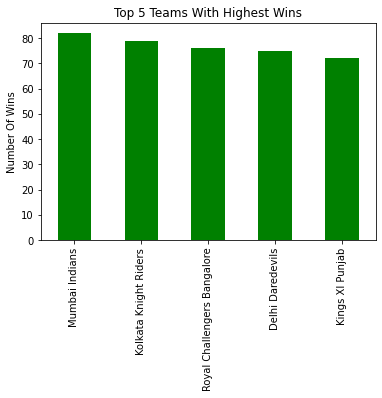

In [53]:
top5.plot.bar(color='green')
plt.title("Top 5 Teams With Highest Wins")
plt.ylabel("Number Of Wins")
plt.show()